In [1]:
import cv2 as cv
import numpy as np
import napari
from skimage.data import coins
import skimage.morphology
import skimage.segmentation
from napari.utils import nbscreenshot

In [2]:
%gui qt

In [3]:
img = coins()

In [4]:
mask = img >120
mask = skimage.morphology.remove_small_holes(mask, 100)
mask = skimage.morphology.remove_small_objects(mask, 100)
mask = (mask*255).astype(np.uint8) # for opencv compatibility

In [5]:
v= napari.Viewer()
v.add_image(img, name="original")
v.add_image(mask, name="masked")
v.add_labels(skimage.morphology.label(mask>0), name="labels")
shapes = v.add_shapes()

In [6]:
# find contours
contours, contour_mat = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Find the rotated rectangles and add as shapes to napari
# note that we need to flip row/col when going between opencv and napari shapes 
for  c in contours:
    minRect = cv.minAreaRect(c)
    box = cv.boxPoints(minRect)
    box = np.intp(box)
    shapes.add(np.flip(np.array(box), axis=1))

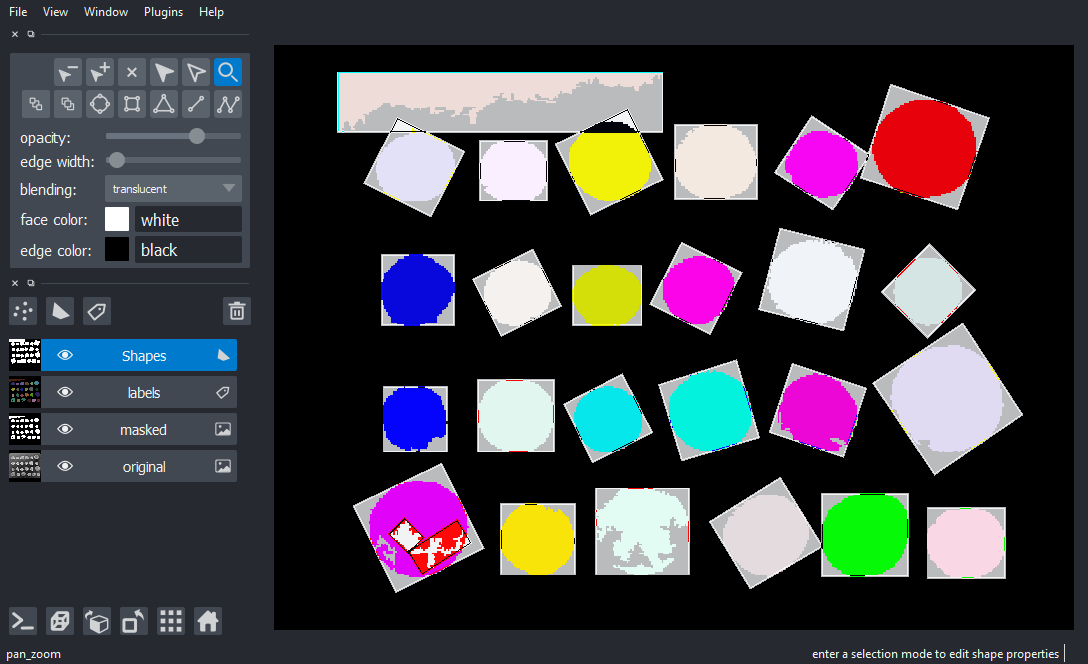

In [7]:
nbscreenshot(v)